<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정확도

사이킷런의 BaseEstimator 클래스를 상속받아 마우런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 CLassifier를 생성함. 사이킷런은 BaseEstimator를 상속받으면 Cistomized 형태의 Estimator를 개발자가 생성할 수 있다. 

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self,X):
    pred=np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'jiinpp'
os.environ['KAGGLE_KEY'] = 'b06d525a9f66198051ccb648b091778a'


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.81MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.2MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 55.9MB/s]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f},재현율:{2:.4f}'.format(accuracy,precision,recall))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#원본데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop(['Survived'], axis=1)

X_titanic_df=transform_features(X_titanic_df)
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

lr_clf=LogisticRegression()

lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101, 정밀도:0.7465,재현율:0.7681


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


정밀도에 비해 재현율이 낮게 나왔다. 재현율 또는 정밀도를 좀 더 강화할 방법은?

In [ ]:
import numpy as np

pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print(pred_proba.shape)
print("pred_proba array에서 앞 3개만 샘플로 추출 : ",pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n",pred_proba_result[:3])

(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 :  [[0.85200153 0.14799847]
 [0.89279033 0.10720967]
 [0.9336069  0.0663931 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85200153 0.14799847 0.        ]
 [0.89279033 0.10720967 0.        ]
 [0.9336069  0.0663931  0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import Binarizer

#Binarizer의 thereshold 설정값, 분류 결정 임곗값임.
custom_threshold=0.5

#predict_proba() 반환 값의 두 번째 칼럼, 즉 positive클래스 칼럼 하나만 추출해 binarizer을 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[92 18]
 [16 53]]
정확도:0.8101, 정밀도:0.7465,재현율:0.7681


In [ ]:
from sklearn.preprocessing import Binarizer

#Binarizer의 thereshold 설정값, 분류 결정 임곗값임.
custom_threshold=0.4

#predict_proba() 반환 값의 두 번째 칼럼, 즉 positive클래스 칼럼 하나만 추출해 binarizer을 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[86 24]
 [13 56]]
정확도:0.7933, 정밀도:0.7000,재현율:0.8116


In [ ]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds=[0.4,0.45,0.5,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  #thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임계값:',custom_threshold)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[86 24]
 [13 56]]
정확도:0.7933, 정밀도:0.7000,재현율:0.8116
임계값: 0.45
오차행렬
[[91 19]
 [14 55]]
정확도:0.8156, 정밀도:0.7432,재현율:0.7971
임계값: 0.5
오차행렬
[[92 18]
 [16 53]]
정확도:0.8101, 정밀도:0.7465,재현율:0.7681
임계값: 0.55
오차행렬
[[97 13]
 [18 51]]
정확도:0.8268, 정밀도:0.7969,재현율:0.7391
임계값: 0.6
오차행렬
[[99 11]
 [25 44]]
정확도:0.7989, 정밀도:0.8000,재현율:0.6377


In [ ]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 떄의 예측 확률을 precision_recall_curve 인자로 입력
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환한 분류 결정 임곗값 배열의 shape:',thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15step으로 추출.
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ',thr_index)
print('샘플용 10개의 임곗값 : ',np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임게값별 정밀도 : ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ',np.round(recalls[thr_index],3))

반환한 분류 결정 임곗값 배열의 shape: (166,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값 :  [0.06 0.1  0.11 0.15 0.19 0.28 0.43 0.57 0.65 0.8  0.91 0.97]
샘플 임게값별 정밀도 :  [0.399 0.418 0.464 0.52  0.594 0.659 0.724 0.803 0.826 1.    1.    1.   ]
샘플 임계값별 재현율 :  [1.    0.957 0.928 0.928 0.913 0.87  0.797 0.71  0.551 0.449 0.232 0.014]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

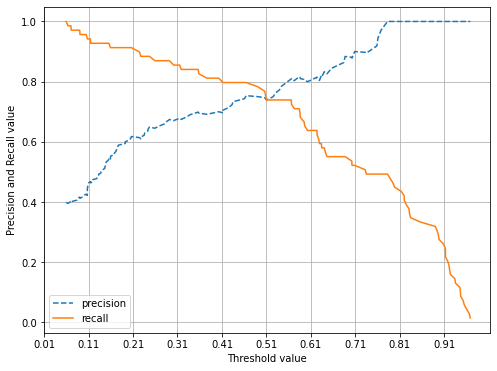

In [ ]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
  #threshold ndarry와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

  #X축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  #threshold 값 X축의 scale을 0.1 단위로 변경
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  #X축,y축 label과 legend 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.metrics import f1_score

f1=f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7571


In [ ]:
def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)#오차행렬
  accuracy=accuracy_score(y_test,pred)#정확도
  precision=precision_score(y_test,pred)#정밀도
  recall=recall_score(y_test,pred)#재현율

  #f1 스코어 추가
  f1=f1_score(y_test,pred)
  print(confusion)

  #f1 score print 추가
  print("정확도 :{0:.4f}, 정밀도 : {0:.4f}, 재현율 : {0:.4f}, f1 : {0:.4f}".format(accuracy,precision,recall,f1))


thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
[[86 24]
 [13 56]]
정확도 :0.7933, 정밀도 : 0.7933, 재현율 : 0.7933, f1 : 0.7933
임계값: 0.45
[[91 19]
 [14 55]]
정확도 :0.8156, 정밀도 : 0.8156, 재현율 : 0.8156, f1 : 0.8156
임계값: 0.5
[[92 18]
 [16 53]]
정확도 :0.8101, 정밀도 : 0.8101, 재현율 : 0.8101, f1 : 0.8101
임계값: 0.55
[[97 13]
 [18 51]]
정확도 :0.8268, 정밀도 : 0.8268, 재현율 : 0.8268, f1 : 0.8268
임계값: 0.6
[[99 11]
 [25 44]]
정확도 :0.7989, 정밀도 : 0.7989, 재현율 : 0.7989, f1 : 0.7989


#  ROC 곡선과 AUC



임곗값이 0.55일 때 가장 좋은 값을 보여준다. 

In [ ]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 steps로 추출
#thresholds[0]은 max(예측확률)+1로 임의설정, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index:',thr_index)
print('샘플 index로 추출한 임곗값 : ',np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 fpr,tpr 값
print('샘플 임곗값별 fpr:' ,np.round(fprs[thr_index],3))
print('샘플 임곗값별 tpr: ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값 :  [0.97 0.69 0.63 0.57 0.38 0.29 0.16 0.11 0.11 0.07]
샘플 임곗값별 fpr: [0.    0.045 0.091 0.109 0.227 0.264 0.473 0.673 0.791 0.918]
샘플 임곗값별 tpr:  [0.014 0.551 0.594 0.739 0.812 0.87  0.913 0.928 0.942 0.971]


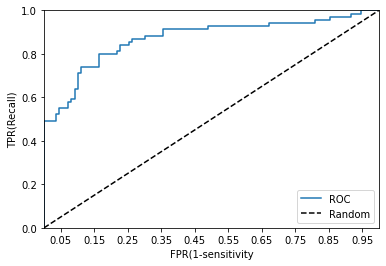

In [ ]:
def roc_curve_plot(y_test,pred_proba_c1):
  #임곗값에 따른 fpr,tpr 값을 반환 받음
  fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
  #roc 곡선을 그래프 곡선으로 그림
  plt.plot(fprs,tprs,label='ROC')
  #가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1],'k--',label='Random')

  #FPR X축의 Scale을 0.1 단위로 변경, X,Y 축 명 설정 등
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
import numpy as np 

print(confusion_matrix(y_target,preds))
print('정확도 : ',np.round(accuracy_score(y_target,preds),4))
print('정밀도 : ',np.round(precision_score(y_target,preds),4))
print("재현율 : ",recall_score(y_target,preds),4)

평가 함수 

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))